# MNIST数据集DEMO

In [ ]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

# 导入数据
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 归一化
x_train, x_test = x_train / 255.0, x_test / 255.0

# 构建模型
# input_shape 参数指定了输入数据的形状，这里输入数据是 28x28 的灰度图像
# flatten 层将输入数据展平，以便将其传递给 Dense 层
# Dense 层是全连接层，128 是隐藏单元的数量，relu 是激活函数，softmax 是输出层的激活函数
# softmax 激活函数将输出转换为概率分布，以便进行分类问题
# 满足概率分布的意思是只指：每个输出都是 0-1，且所有输出相加为 1
# output 层是输出层，10 是输出的维度,因为是数字 0-9分类问题，输出维度是 10
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 编译模型
# 使用 adam 优化器，sparse_categorical_crossentropy 作为损失函数，accuracy 作为评价指标
# loss from_logits=False 是因为输出层使用了 softmax 激活函数，所以不需要将输出转换为概率分布
# metrics=['accuracy'] 是评价指标，accuracy 是准确率
model.compile(optimizer='adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# 训练模型
# 设置训练参数，epochs 是迭代次数，batch_size 是批量大小
# validation_data 参数指定了验证数据，validation_freq 参数指定了每多少次迭代进行一次验证
# batch_size 默认是 32，validation_freq 默认是 1 ，
model.fit(x_train, y_train, epochs=5,batch_size=32, validation_data=(x_test, y_test),validation_freq=1)


# 总结
print(model.summary())

Epoch 1/5


2024-12-09 17:09:22.206359: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 2s 1ms/step - loss: 0.2560 - accuracy: 0.9267 - val_loss: 0.1399 - val_accuracy: 0.9570
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1165 - accuracy: 0.9656 - val_loss: 0.0984 - val_accuracy: 0.9690
Epoch 3/5
1875/1875 [==============================] - 2s 996us/step - loss: 0.0805 - accuracy: 0.9760 - val_loss: 0.0894 - val_accuracy: 0.9722
Epoch 4/5
1875/1875 [==============================] - 2s 982us/step - loss: 0.0600 - accuracy: 0.9817 - val_loss: 0.0801 - val_accuracy: 0.9745
Epoch 5/5
1875/1875 [==============================] - 2s 910us/step - loss: 0.0476 - accuracy: 0.9848 - val_loss: 0.0781 - val_accuracy: 0.9757
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 de

y_train[0]: 5
x_train.shape: (60000, 28, 28)
x_test.shape: (10000, 28, 28)


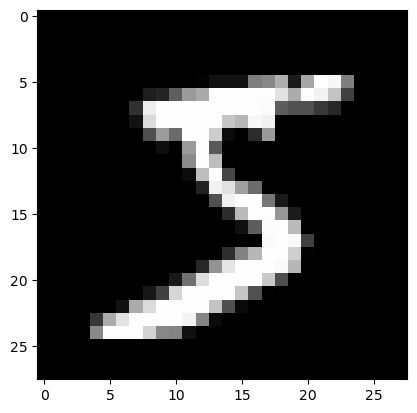

In [11]:
import matplotlib.pyplot as plt

# print(f'x_train[0]: {x_train[0]}')

plt.imshow(x_train[0], cmap='gray')

print(f'y_train[0]: {y_train[0]}')

print(f'x_train.shape: {x_train.shape}')

print(f'x_test.shape: {x_test.shape}')

313/313 [==============================] - 0s 470us/step
p[0]: [2.7171302e-06 8.0385682e-08 1.5980202e-05 2.4550926e-04 1.3168253e-09
 4.2557414e-07 2.6212194e-12 9.9934775e-01 9.8111959e-06 3.7771245e-04]
y_test[0]: 7
p[0] max : 7


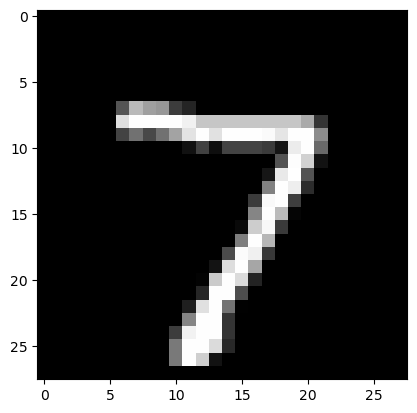

In [22]:
p = model.predict(x_test)

print(f'p[0]: {p[0]}')

print(f'y_test[0]: {y_test[0]}')

plt.imshow(x_test[0] , cmap = 'gray')

print(f'p[0] max : {tf.argmax(p[0])}')